<div style="
    background: #022c22;
    color: #34d399;
    font-weight: 800;
    padding: 20px;
    border-radius: 20px;
    text-align: center;
    font-size: 35px;
    box-shadow: 0 0 25px #10b981;
    font-family: Georgia, serif;
">
    Applied Statistical Analysis Using Regression and Hypothesis Testing
</div>

<div style="background:#020617; color:#38bdf8;
            font-family:'Courier New', monospace;
            font-weight:700; padding:14px; border-radius:12px;
            text-align:center; font-size:25px;">
&gt;&gt; Import Libraries, Statistical Methods, Algorithms, Metrics
</div>

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import ztest
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder ,StandardScaler

<div style="background:#020617; color:#1e3a8a; font-weight:800;
            padding:18px; border-radius:18px; text-align:center;
            font-size:30px;
            box-shadow:0 0 25px #2563eb;">
    Load dataset
</div>

In [52]:
df=pd.read_csv(r"C:\Users\tsiha\Downloads\EV Energy Efficiency Dataset.csv")
df

,Model year,Make,Model,Vehicle class,Motor (kW),Recharge time (h),Energy Efficiency (km/kWh)
0,2012,Mitsubishi,i-MiEV,Subcompact,49,7.0,5.347594
1,2012,Nissan,LEAF,Mid-size,80,7.0,4.739336
2,2013,Ford,Focus Electric,Compact,107,4.0,5.000000
3,2013,Mitsubishi,i-MiEV,Subcompact,49,7.0,5.347594
4,2013,Nissan,LEAF,Mid-size,80,7.0,4.739336
...,...,...,...,...,...,...,...
1192,2026,Volvo,EX30 Twin Performance,Sport utility vehicle: Small,315,8.0,5.181347
1193,2026,Volvo,"EX30 Cross Country (18"" Wheels)",Sport utility vehicle: Small,315,8.0,4.255319
1194,2026,Volvo,"EX30 Cross Country (19"" Wheels)",Sport utility vehicle: Small,315,8.0,4.716981
1195,2026,Volvo,EX40,Sport utility vehicle: Small,185,8.0,5.076142


<div style="background:#020617; color:#1e3a8a; font-weight:800;
            padding:18px; border-radius:18px; text-align:center;
            font-size:30px;
            box-shadow:0 0 25px #2563eb;">
    Checking shape, info and describ
</div>

In [53]:
df.shape

(1197, 7)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Model year                  1197 non-null   int64  
 1   Make                        1197 non-null   object 
 2   Model                       1197 non-null   object 
 3   Vehicle class               1197 non-null   object 
 4   Motor (kW)                  1197 non-null   int64  
 5   Recharge time (h)           1197 non-null   float64
 6   Energy Efficiency (km/kWh)  1197 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 65.6+ KB


In [55]:
df.describe()

,Model year,Motor (kW),Recharge time (h),Energy Efficiency (km/kWh)
count,1197.000000,1197.000000,1197.000000,1197.000000
mean,2023.231412,341.289891,10.547285,4.453765
std,2.881857,152.722951,2.706302,0.856691
min,2012.000000,35.000000,3.000000,2.114165
25%,2022.000000,230.000000,8.500000,3.787879
50%,2024.000000,335.000000,10.500000,4.366812
75%,2025.000000,420.000000,12.000000,5.102041
max,2026.000000,930.000000,18.600000,6.944444


In [56]:
df.columns

Index(['Model year', 'Make', 'Model', 'Vehicle class', 'Motor (kW)',
       'Recharge time (h)', 'Energy Efficiency (km/kWh)'],
      dtype='object')

In [57]:
df.isnull().sum()

Model year                    0
Make                          0
Model                         0
Vehicle class                 0
Motor (kW)                    0
Recharge time (h)             0
Energy Efficiency (km/kWh)    0
dtype: int64

In [58]:
for x in df:
    print(x)
    print(df[x].unique())
    print(df[x].nunique())

Model year
[2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025
 2026]
15
Make
['Mitsubishi' 'Nissan' 'Ford' 'smart' 'Tesla' 'Chevrolet' 'BMW' 'Kia'
 'Tesla ' 'Hyundai' 'Volkswagen' 'Audi' 'Jaguar' 'smart EQ' 'MINI'
 'Porsche' 'Polestar' 'Volvo' 'Lucid' 'Mazda' 'Mercedes-Benz' 'Rivian'
 'Cadillac' 'Fisker' 'Genesis' 'Lexus' 'Subaru' 'Toyota' 'VinFast' 'Acura'
 'Dodge' 'FIAT' 'GMC' 'Honda' 'Jeep' 'Rolls-Royce' 'Ford ']
37
Model
['i-MiEV' 'LEAF' 'Focus Electric' 'fortwo electric drive cabriolet'
 'fortwo electric drive coupe' 'Model S (40 kWh)' 'Model S (60 kWh)'
 'Model S (85 kWh)' 'Model S Performance' 'Spark EV' 'i3' 'Soul EV'
 'Model S (70 kWh)' 'Model S (85/90 kWh)' 'Model S 70D' 'Model S 85D/90D'
 'Model S P85D/P90D' 'LEAF (24 kWh)' 'LEAF (30 kWh)'
 'Model S (60 kWh pre-6/16)' 'Model S (75 kWh)' 'Model S 60D'
 'Model S 75D' 'Model S 90D (Refresh)' 'Model S P90D (Refresh)'
 'Model S P100D' 'Model X 60D' 'Model X 75D' 'Model X 90D' 'Model X P90D'
 'Model X P100D' 'i

<div style="background:#020617; color:#1e3a8a; font-weight:800;
            padding:18px; border-radius:18px; text-align:center;
            font-size:30px;
            box-shadow:0 0 25px #2563eb;">
    Outlier detection
</div>

Model year: 84 outliers
Motor (kW): 29 outliers
Recharge time (h): 16 outliers
Energy Efficiency (km/kWh): 0 outliers


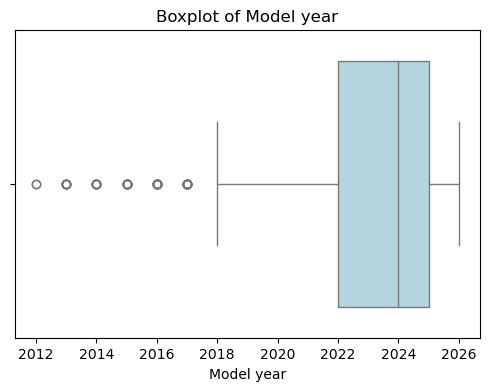

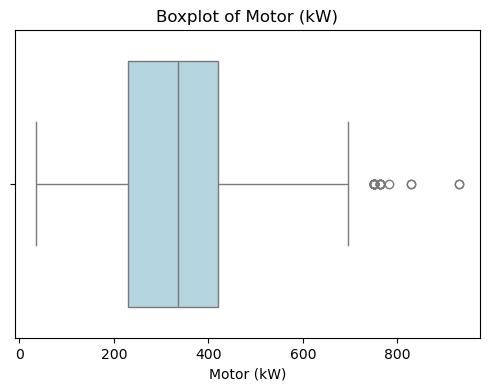

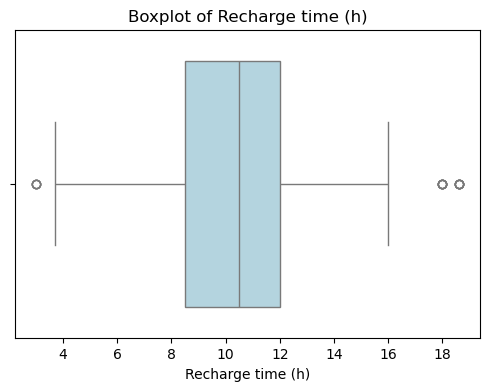

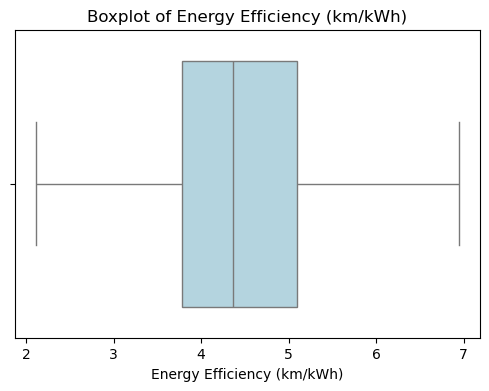

In [59]:
num_cols = ['Model year', 'Motor (kW)', 'Recharge time (h)', 'Energy Efficiency (km/kWh)']

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"{col}: {len(outliers)} outliers")
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.show()

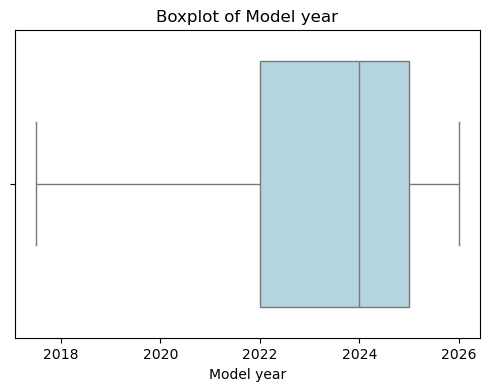

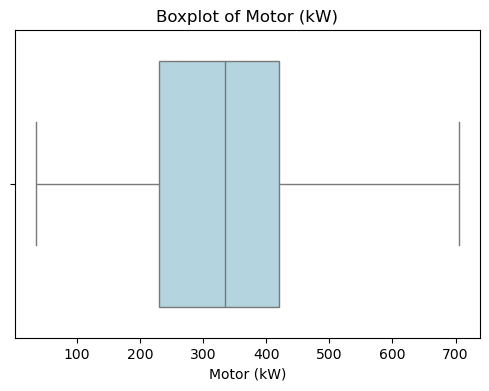

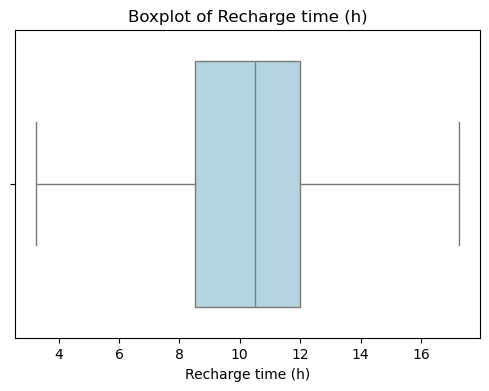

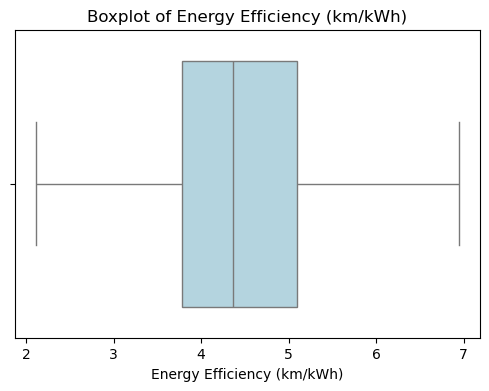

In [60]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else x)
    df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else x)
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.show()

<div style="background:#020617; color:#1e3a8a; font-weight:800;
            padding:18px; border-radius:18px; text-align:center;
            font-size:30px;
            box-shadow:0 0 25px #2563eb;">
    EDA
</div>

<h1 style="font-family: Georgia; font-size: 38px; color: blue;">
    Scatter plot
</h1>


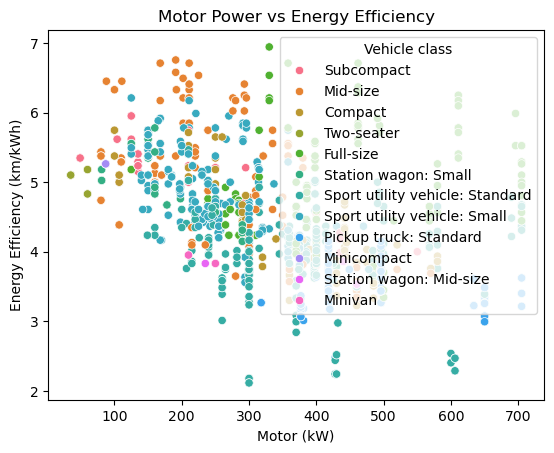

In [61]:
sns.scatterplot(
    data=df,
    x='Motor (kW)',
    y='Energy Efficiency (km/kWh)',
    hue='Vehicle class'
)
plt.title("Motor Power vs Energy Efficiency")
plt.show()

<h1 style="font-family: Georgia; font-size: 38px; color: blue;">
    Count plot
</h1>


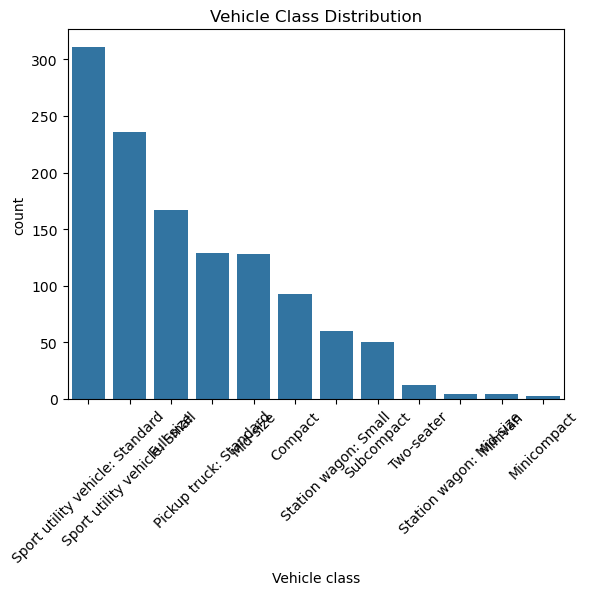

In [62]:
sns.countplot(
    data=df,
    x='Vehicle class',
    order=df['Vehicle class'].value_counts().index
)
plt.xticks(rotation=45)
plt.title("Vehicle Class Distribution")
plt.show()

<div style="background:#020617; color:#1e3a8a; font-weight:800;
            padding:18px; border-radius:18px; text-align:center;
            font-size:30px;
            box-shadow:0 0 25px #2563eb;">
    Hypothesis Test
</div>

### Null Hypothesis : There is no significant difference in mean ApplicantIncome between approved and rejected applicants

### Alternative Hypothesis : There is a significant difference in mean ApplicantIncome between approved and rejected applicant

<h1 style="font-family: Georgia; font-size: 38px; color: blue;">
    Z-Test
</h1>


In [ ]:
efficiency_class1 = df[df['Vehicle class'] == 'Compact']['Energy Efficiency (km/kWh)'].dropna()
efficiency_class2 = df[df['Vehicle class'] == 'Mid-size']['Energy Efficiency (km/kWh)'].dropna()
print(len(efficiency_class1), len(efficiency_class2)) 
z_stat, p_value = ztest(efficiency_class1, efficiency_class2,value=0)
print("Z-statistic:", z_stat)
print("P-value:", p_value)

In [ ]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

<h1 style="font-family: Georgia; font-size: 38px; color: blue;">
   T-Test
</h1>

In [ ]:
df['Motor_Level'] = pd.qcut(df['Motor (kW)'], q=2, labels=['Low', 'High'])
high_eff = df[df['Motor_Level'] == 'High']['Energy Efficiency (km/kWh)'].dropna()
low_eff = df[df['Motor_Level'] == 'Low']['Energy Efficiency (km/kWh)'].dropna()
t_stat, p_value = ttest_ind(high_eff, low_eff, equal_var=False)
print("T-statistic:", t_stat)
print("P-value:", p_value)

In [64]:
alpha = 0.05
if p_value < alpha:
    print("Reject the Null Hypothesis ")
else:
    print("Fail to Reject the Null Hypothesis")

Reject the Null Hypothesis 


<h1 style="font-family: Georgia; font-size: 38px; color: blue;">
    Chi2 Test
</h1>

In [65]:
df['Motor_Level'] = pd.qcut(df['Motor (kW)'], q=2, labels=['Low', 'High'])
contingency_table = pd.crosstab(df['Vehicle class'], df['Motor_Level'])
print("Contingency Table:\n", contingency_table)
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

Contingency Table:
 Motor_Level                      Low  High
Vehicle class                             
Compact                           33    60
Full-size                         41   126
Mid-size                          99    29
Minicompact                        3     0
Minivan                            4     0
Pickup truck: Standard             4   125
Sport utility vehicle: Small     208    28
Sport utility vehicle: Standard   99   212
Station wagon: Mid-size            1     3
Station wagon: Small              58     2
Subcompact                        38    12
Two-seater                        12     0


In [66]:
print("\nChi-square Statistic:", chi2)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)


Chi-square Statistic: 467.0076514854401
P-value: 3.447129016073056e-93
Degrees of Freedom: 11


In [67]:
if p_value < 0.05:
    print("There is a statistically significant association between Vehicle class and Motor_Level.")
else:
    print("There is no statistically significant association between Vehicle class and Motor_Level.")

print("\n")

There is a statistically significant association between Vehicle class and Motor_Level.




<h1 style="font-family: Georgia; font-size: 38px; color: blue;">
    Anova Test
</h1>

In [68]:
anova = df[['Model year', 'Energy Efficiency (km/kWh)']]

In [69]:
anova

,Model year,Energy Efficiency (km/kWh)
0,2017.5,5.347594
1,2017.5,4.739336
2,2017.5,5.000000
3,2017.5,5.347594
4,2017.5,4.739336
...,...,...
1192,2026.0,5.181347
1193,2026.0,4.255319
1194,2026.0,4.716981
1195,2026.0,5.076142


In [70]:
groups = anova.groupby('Model year')['Energy Efficiency (km/kWh)'].apply(list)
groups

Model year
2017.5    [5.347593583, 4.739336493, 5.0, 5.347593583, 4...
2018.0    [5.617977528, 5.291005291, 5.681818182, 5.1020...
2019.0    [3.533568905, 5.405405405, 5.405405405, 5.6818...
2020.0    [3.663003663, 5.405405405, 5.405405405, 5.6179...
2021.0    [3.703703704, 3.663003663, 5.405405405, 5.4054...
2022.0    [3.703703704, 3.663003663, 3.584229391, 3.0864...
2023.0    [3.759398496, 3.731343284, 3.90625, 3.84615384...
2024.0    [4.166666667, 3.745318352, 4.032258065, 4.0322...
2025.0    [5.076142132, 5.747126437, 5.464480874, 4.7619...
2026.0    [5.464480874, 4.651162791, 4.651162791, 4.0, 4...
Name: Energy Efficiency (km/kWh), dtype: object

In [71]:
f_statistic, p_value = stats.f_oneway(*groups)

In [72]:
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


F-statistic: 17.06024868980287
P-value: 1.0444122168873789e-26


In [73]:
if p_value < 0.05:
    print("There are significant differences in Energy Efficiency across Model years.")
else:
    print("There are no significant differences in Energy Efficiency across Model years.")


There are significant differences in Energy Efficiency across Model years.


<h1 style="font-family: Georgia; font-size: 38px; color: blue;">
   Fisher’s Exact Test
</h1>

In [94]:
df['Motor_Level'] = pd.qcut(df['Motor (kW)'], q=2, labels=['Low', 'High'])
df['Vehicle_Class_Type'] = df['Vehicle class'].apply(
    lambda x: 'Small' if x in ['Subcompact', 'Compact'] else 'Large')


In [95]:
table = pd.crosstab(df['Vehicle_Class_Type'], df['Motor_Level'])
print(table)


Motor_Level         Low  High
Vehicle_Class_Type           
Large               600   597


In [93]:
odds_ratio, p_value = fisher_exact(table)

print("Odds Ratio:", odds_ratio)
print("P-value:", p_value)


Odds Ratio: 1.0
P-value: 1.0


In [96]:
if p_value < 0.05:
    print("There are significant differences in Energy Efficiency across Vehicle Class.")
else:
    print("There are no significant differences in Energy Efficiency across Vehicle Class.")


There are no significant differences in Energy Efficiency across Vehicle Class.


<div style="background:#020617; color:#1e3a8a; font-weight:800;
            padding:18px; border-radius:18px; text-align:center;
            font-size:30px;
            box-shadow:0 0 25px #2563eb;">
    Model building
</div>

In [74]:
X = df[['Motor (kW)', 'Recharge time (h)']]  
y = df['Energy Efficiency (km/kWh)']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h1 style="font-family: Georgia; font-size: 38px; color: blue;">
    Encoding
</h1>

In [85]:
categorical_cols = ['Make', 'Model', 'Vehicle class']  
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

<h1 style="font-family: Georgia; font-size: 38px; color: blue;">
    Scaling
</h1>

In [77]:
scaler = StandardScaler()

In [78]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [80]:
y_pred = model.predict(X_test_scaled)

In [81]:
print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R²: 0.26401863857571983
MSE: 0.5245355470342253


<h1 style="font-family: Georgia; font-size: 38px; color: blue;">
    F-Test



In [34]:
n = len(y_test)  
p = X_train.shape[1]

In [35]:
RSS = np.sum((y_test - y_pred) ** 2)

In [36]:
TSS = np.sum((y_test - np.mean(y_test)) ** 2)

In [37]:
ESS = TSS - RSS

In [38]:
MSE = RSS / (n - p - 1)

In [39]:
MSR = ESS / p

In [40]:
F_statistic = MSR / MSE

In [41]:
p_value = 1 - stats.f.cdf(F_statistic, p, n - p - 1)

In [42]:
print('F-statistic:', F_statistic)
print('p-value:', p_value)

F-statistic: 42.50951221193612
p-value: 2.220446049250313e-16


In [43]:
if p_value < 0.05:
    print('The model is significant at the 5% significance level.')
else:
    print('The model is not significant at the 5% significance level.')

The model is significant at the 5% significance level.


In [44]:
MSE

np.float64(0.531175237503013)

In [45]:
mse=mean_squared_error(y_test,y_pred)
mse

0.5245355470342253

In [46]:
r2=r2_score(y_test,y_pred)
r2

0.26401863857571983

<div style="background:#020617; color:#1e3a8a; font-weight:800;
            padding:18px; border-radius:18px; text-align:center;
            font-size:30px;
            box-shadow:0 0 25px #2563eb;">
    Conclusion
</div>

### This dataset provides a structured overview of electric vehicles (EVs) across different model years, manufacturers, vehicle classes, motor power, recharge time, and energy efficiency. Based on the analysis and structure of the data, the following conclusions can be drawn:

### Energy efficiency varies significantly by vehicle class and motor power. Smaller and subcompact EVs generally show higher energy efficiency (km/kWh) compared to larger or higher-power vehicles.

### Higher motor capacity (kW) tends to improve performance but often comes at the cost of lower energy efficiency, indicating a trade-off between power and efficiency.

### Recharge time remains relatively consistent across many models, suggesting standardized charging technology for vehicles of similar generations.

### Model year progression reflects gradual improvements in EV technology, with newer models typically offering better efficiency and optimized power usage.

### The dataset is well-suited for statistical analysis and hypothesis testing (z-test, t-test, chi-square, ANOVA) to study relationships between motor power, vehicle class, and energy efficiency.

### Overall, this dataset is valuable for EV performance analysis, energy efficiency comparison, and predictive modeling, helping researchers and analysts understand how design and technical factors influence electric vehicle efficiency and usability.